In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/queries/query-result.csv', delimiter=';')

df.head()

,s,o
0,kg:reaction_acald,kg:reaction_cs
1,kg:reaction_acald,kg:reaction_mals
2,kg:reaction_acald,kg:reaction_ptar
3,kg:reaction_acald,kg:reaction_glusy
4,kg:reaction_acald,kg:reaction_pyk


In [3]:
df.shape

(358, 2)

In [4]:
'''
Reactions names to integer ID
'''
from sklearn.preprocessing import LabelEncoder

rxn = pd.concat([df['s'], df['o']])

le = LabelEncoder()
le.fit_transform(rxn)

df['s'] = le.transform(df['s'])
df['o'] = le.transform(df['o'])

In [5]:
print(df['s'].nunique())
print(df['o'].nunique())

# nunique of both df['s'] and df['o']
print(len(np.unique(list(df['s'].unique()) + list(df['o'].unique()))))

65
57
66


In [6]:
import networkx as nx
from networkx import from_pandas_edgelist

G = from_pandas_edgelist(df, source='s', target='o')

In [7]:
G.number_of_nodes()

66

Δεν θα έπρεπε ο αριθμός των nodes να είναι ίσος με τον αριθμό των αντιδράσεων;

In [8]:
G.number_of_edges()

271

Και ο αριθμός των edges να είναι ίσος με τον αριθμό των μεταβολιτών;

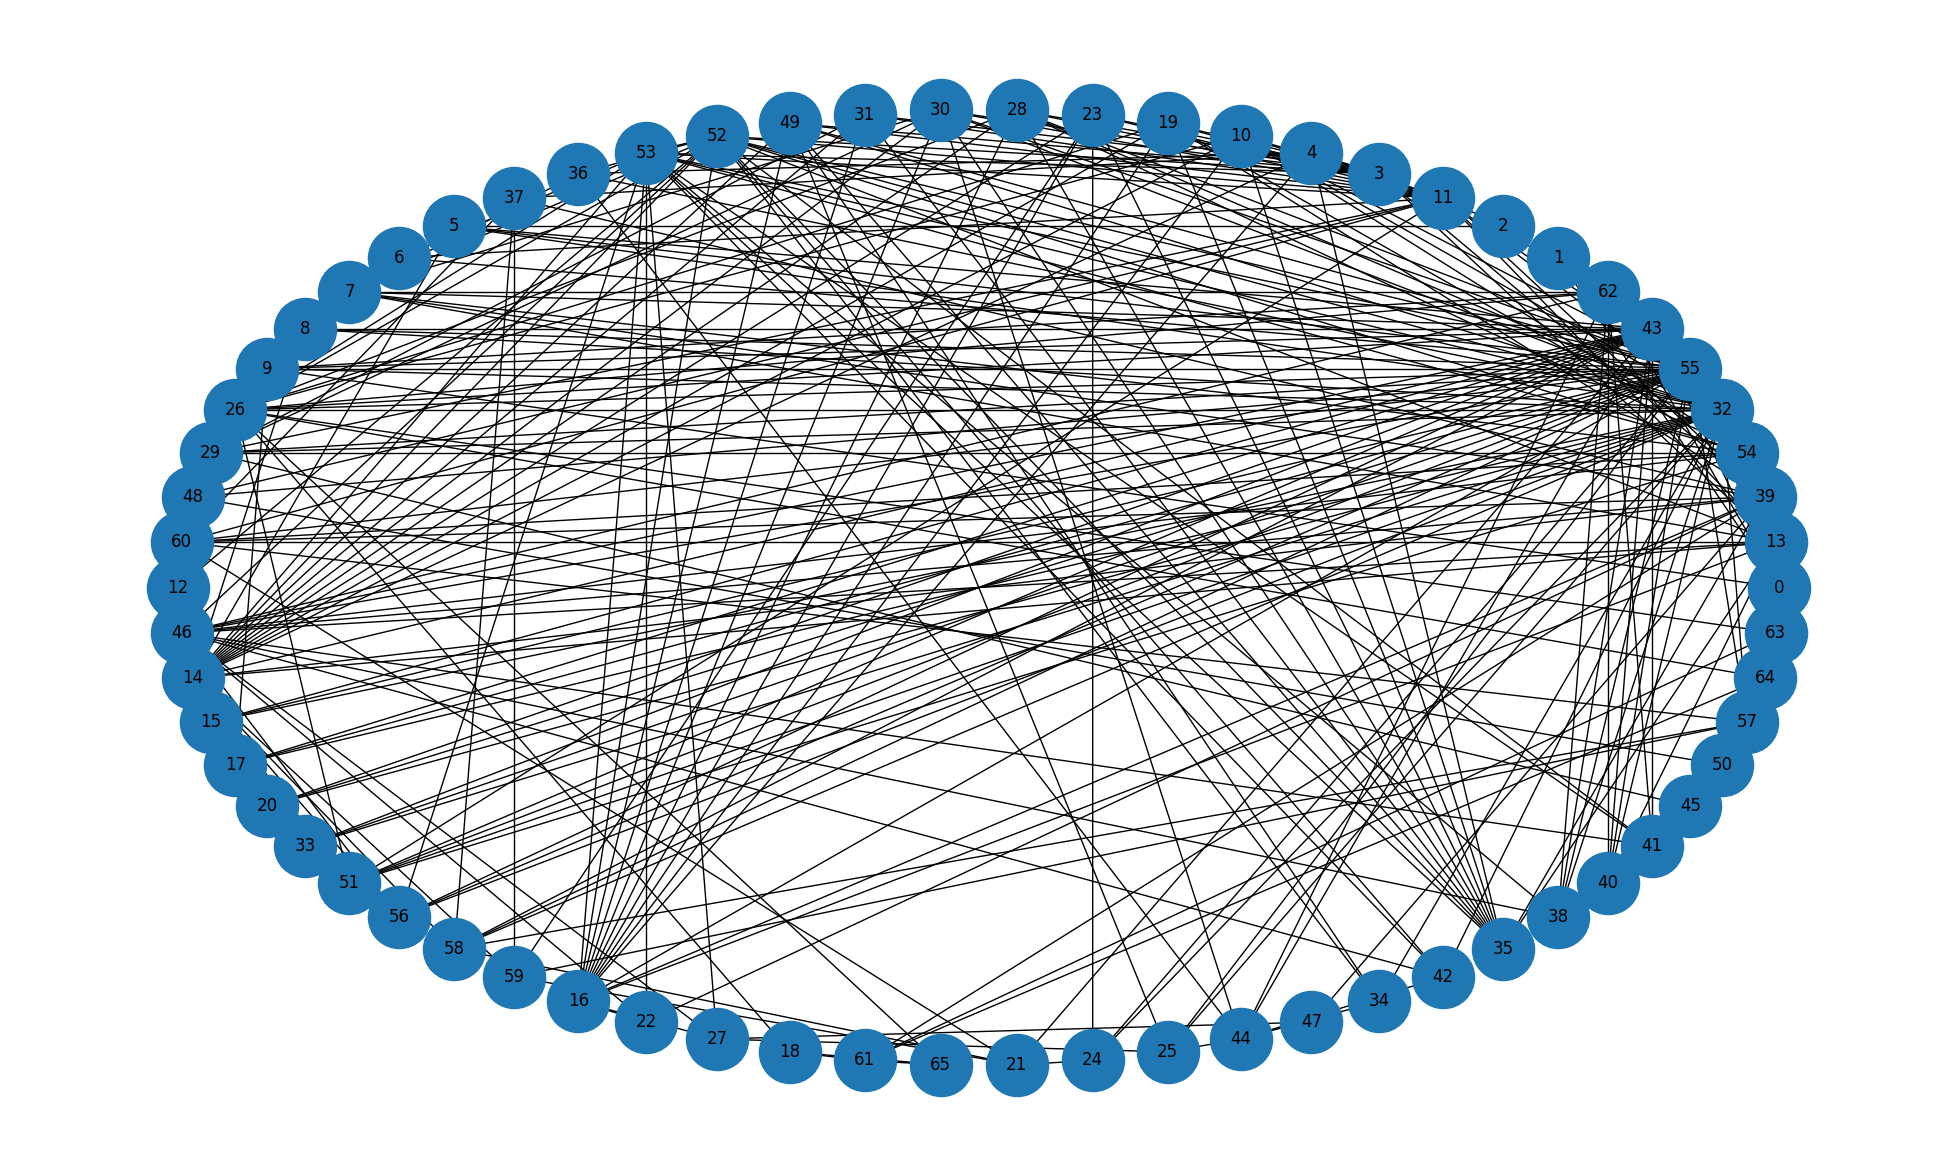

In [13]:
plt.figure(figsize=(25,15))
ax = plt.gca()
nx.draw_circular(G,with_labels = True, node_size=2000)
plt.show()

In [14]:
print("Network density:", nx.density(G))

Network density: 0.12634032634032635


__The density value implies that this is not very dense network (on a scale from 0-1).__

In [15]:
from operator import itemgetter

betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
(55, 0.20566531960124193)
(32, 0.1493775865354674)
(26, 0.10793805243147293)
(39, 0.10157196847860955)
(14, 0.07734356579354533)
(52, 0.06638313387799333)
(11, 0.0645645492566243)
(43, 0.06288496800836187)
(53, 0.04669919059538695)
(29, 0.037334977594722145)
(0, 0.03518172548561663)
(48, 0.03076923076923077)
(16, 0.028179697039468356)
(46, 0.024822029010291454)
(60, 0.01950646314105271)
(13, 0.015739749004061495)
(62, 0.014453188198886767)
(30, 0.013609297304869893)
(54, 0.013586645631176165)
(3, 0.011396983803947396)


In [16]:
pagerank_dict = nx.pagerank(G)
sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by page rank:")
for b in sorted_pagerank[:20]:
    print(b)

Top 20 nodes by page rank:
(55, 0.05722633556908435)
(32, 0.05142709490871842)
(14, 0.037946112094929776)
(43, 0.034301217964891176)
(11, 0.03408540205113646)
(52, 0.030892069711813165)
(39, 0.030105229851878825)
(26, 0.029665615963017134)
(53, 0.028462128475669708)
(16, 0.025007593815912107)
(46, 0.022361082463919945)
(13, 0.02142034381860186)
(3, 0.020048225913290404)
(35, 0.020048225913290404)
(62, 0.0193032714184665)
(54, 0.018858613714929886)
(0, 0.01735611123933083)
(30, 0.017041342892331512)
(60, 0.016318104688920178)
(29, 0.0159890440518374)


## Node Embidding using DeepWalk

In [ ]:
from karateclub import DeepWalk

In [ ]:
dw_model = DeepWalk(walk_number=10, walk_length=80, dimensions=64)
dw_model.fit(G)
embedding = dw_model.get_embedding()
print(embedding.shape)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(embedding)

labels = kmeans.labels_

In [ ]:
results = pd.DataFrame(labels)
results[0].value_counts()

In [ ]:
results[results[0] == 1]

In [ ]:
le.inverse_transform(results[results[0] == 1].index.values)

## Torch Geometric

In [ ]:
import torch
from torch_geometric.utils.convert import from_networkx

In [ ]:
pyg_graph = from_networkx(G)

In [ ]:
print(pyg_graph.num_nodes)

print(pyg_graph.num_edges)